In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1. Amended Discrete Fourier Transform

We will apply the DFT to the dataseries in the file discrete_fourier_transform_amended_data.csv in the Data folder of the GitHub repository. The data consists of $N=201$ datapoints sampled from the function $y = 3.5 \times \sin \left ( \pi(x-3)\right ) +  1.5\times\sin \left (3\pi(x+7) \right ) + \sin \left ( 4\pi x\right )$. The data is sampled between $x=-10$ to $x=10.0$ with an interval of $\Delta x = 0.1$. The data is identical to that used in the DFT code example in the main text of Chapter 9, with the exception of the extra datapoint at $x=10.0$ 

Since we have a different dataset (albeit on a small difference) to that used in the main text, and the DFT constructs a representation of the dataset, we will end up with a different set of amplitude values when we compute the DFT of the this new dataseries. Let's chek

We'll start by reading in the data.

In [2]:
df_dft = pd.read_csv('../Data/discrete_fourier_transform_amended_data.csv')

A look at the dataframe, shows that we have two columns of data, the x-values and the value of the function (the y-values) corresponding to those x-values. For the DFT we only need the y-values. 

In [3]:
df_dft.head()

,x,y
0,-10.0,1.010775e-14
1,-9.9,-1.344028e+00
2,-9.8,-2.896048e+00
3,-9.7,-3.882870e+00
4,-9.6,-3.398076e+00


In [4]:
df_dft.tail()

,x,y
196,9.6,3.398076e+00
197,9.7,3.882870e+00
198,9.8,2.896048e+00
199,9.9,1.344028e+00
200,10.0,1.279917e-14


We can see that there are $N=201$ datapoints in this new dataseries, compared to $N=200$ in the example used in the main text.

If we plot the data it looks almost identical to the data used in the DFT code example in the main text of Chapter 9. This is not surprising. They differ only by one datapoint at $x=10.0$. But we will see more marked differences in their DFT amplitudes.

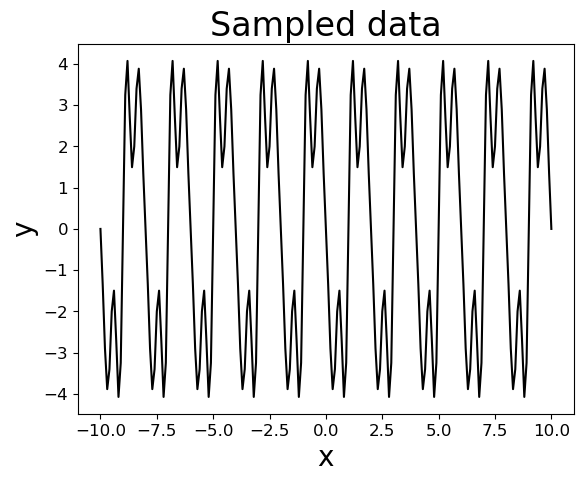

In [5]:
# Plot of the data to which we will apply the DFT
plt.plot(df_dft.x, df_dft.y, 'black')
plt.title('Sampled data', fontsize=24)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

To calculate the DFT we pass a numpy array into the numpy FFT function, which we call using numpy.fft.fft . FFT stands for Fast Fourier Transform, which is a computationally efficient method for computing the Discrete Fourier Transform of a dataseries.

In [6]:
dft_y = np.fft.fft(df_dft['y'].to_numpy())

We'll calculate the absolute values (modulus) of the DFT values to get a real-valued measure of how much of each wavenumber is present in our data series. We are only expecting to see three waves present.

In [7]:
# Take modulus of amplitudes
dft_amplitudes = np.absolute(dft_y)

If we plot those absolute amplitudes we see lots of non-zero values. 

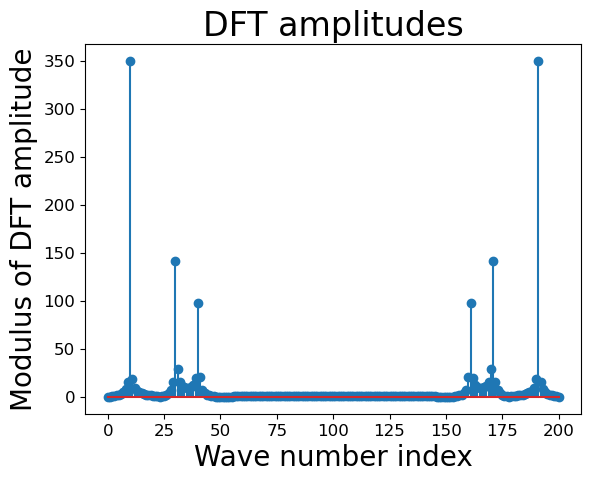

In [8]:
# Plot the modulus of the amplitudes
plt.stem(dft_amplitudes)
plt.title('DFT amplitudes', fontsize=24)
plt.xlabel('Wave number index', fontsize=20)
plt.ylabel('Modulus of DFT amplitude', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The amplitudes still show a symmetric pattern, because this is still a real-valued dataseries. We also still see six big spikes. If we look at the array of amplitude values we can see where precisely those six spikes are.

In [9]:
# List the array of amplitudes
dft_amplitudes

array([1.66533454e-13, 3.73396466e-01, 7.68691400e-01, 1.21249941e+00,
       1.74319497e+00, 2.42481617e+00, 3.38050117e+00, 4.89086083e+00,
       7.77949264e+00, 1.60004387e+01, 3.49706161e+02, 1.89553362e+01,
       9.41891460e+00, 6.29058175e+00, 4.70029035e+00, 3.71183276e+00,
       3.01674147e+00, 2.48220789e+00, 2.03996690e+00, 1.64934515e+00,
       1.28209469e+00, 9.14737886e-01, 5.23390103e-01, 7.84789034e-02,
       4.63246790e-01, 1.17449196e+00, 2.19498357e+00, 3.83990702e+00,
       7.01055861e+00, 1.57477293e+01, 1.41930090e+02, 2.90787051e+01,
       1.54257366e+01, 1.15677295e+01, 9.96226936e+00, 9.34058664e+00,
       9.39821818e+00, 1.02205699e+01, 1.24554986e+01, 1.92355205e+01,
       9.73057737e+01, 2.04443276e+01, 7.57980499e+00, 4.01457861e+00,
       2.39101016e+00, 1.48612839e+00, 9.22273251e-01, 5.45075325e-01,
       2.80048804e-01, 8.70380308e-02, 5.74017948e-02, 1.67808642e-01,
       2.53632823e-01, 3.21255216e-01, 3.75120943e-01, 4.18408720e-01,
      

The biggest spikes are still those at wavenumbers of $k=10, 30, 40$ and their symmetric counterparts at $k=191, 171, 161$. This is because the data has still been taken from that function with three sine waves, $y = 3.5 \times \sin \left ( \pi(x-3)\right ) +  1.5\times\sin \left (3\pi(x+7) \right ) + \sin \left ( 4\pi x\right )$. However, we have lots of small non-zero amplitudes which are needed to represent the additional datapoint in this new dataseries.